### 不連続回帰デザインの背景
#### 補講授業の効果を調べる
ある大学の講義において、前期試験で$c$点未満であった学生は、補講授業に参加することが義務付けられており、$c$点以上であった学生は補講授業に参加しないものとする。
データとして、各学生の前期試験、後期試験の点数が得られているとし、補講授業の学習効果を調べる問題を考える。
ある学生$i(i=1,\cdots,n)$について、補講授業に参加している場合%T_i=1%、不参加の場合$T_i=0$とし、後期試験の点数を$Y_i$で表す。
ルービンの因果モデルに従って、学生$i$が参加したときに得られる後期試験の点数を$Y_{1i}$、参加しなかったときに得られる点数を$Y_{0i}$とかく。
さらに、学生$i$の前期試験の点数を表す変数を$Z_i$とすれば、トリートメントの割り当ては

$$
T_i=\left\{
\begin{array}{ll}
1 & if\ Z_i<c \\
0 & if\ Z_i\geq c
\end{array}
\right.
$$

のように表せる。ただし、$c$の値は既知とする。
この、トリートメントの状態を決定する変数$Z_i$を**強制変数**と呼ぶ。
強制変数は必ず連続変数とし、$Z_i=c$となるような$i$は存在しないものとする。

ここで、データとして200人の学生について$\{(Y_i,Z_i):i=1,\cdots,200\}$が得られたとする。
このデータにおいて$c=60$となっている。

In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/Ch10.data.csv')
data.head()

,Y,Z
0,72.732649,57.010677
1,76.890651,75.347420
2,51.046729,64.336421
3,77.169467,73.305546
4,72.506933,45.013193


Text(0, 0.5, 'Y:後期試験点数')

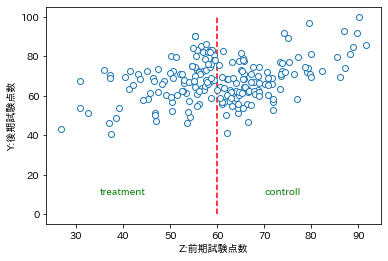

In [18]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.plot(data.Z, data.Y, 'o', mfc='white')
plt.vlines(60,0,100,linestyles='--', color='red')
for i, s in enumerate(['treatment', 'controll']):
    plt.text(x=35+35*i, y=10, s=s, color='green')
plt.xlabel('Z:前期試験点数')
plt.ylabel('Y:後期試験点数')

全体的に前期試験の点数が高いほど後期試験の点数も高い、という右肩上がりの傾向が確認できる。
一方、$Z=60$付近の集団に限定して成績を比較してみると、トリートメントグループの後期試験における点数の方が、コントロールグループのそれと比べて高い傾向がある。
この結果は、「補講授業に参加することがもたらす学力への因果的効果が正である」ということを意味する。
#### トリートメント効果の識別：連続性条件
いま、$Y_{1i}-Y_{0i}$の値を調べたいが、観測できるのは$Y_{1i}$と$Y_{0i}$のどちらか一方のみである。
したがって、個々の$i$に対する因果的効果でなく、一定のグループにおける平均的な因果的効果の推定を考える。
もし補講授業への参加$T_i$が潜在的な点数$(Y_{1i},Y_{0i})$と完全に独立ならば、単純にトリートメントグループ/コントロールグループの$Y$の平均値の差から平均トリートメント効果(ATE)が推定できる。
しかし、明らかに$Z_i$は$T_i$と$(Y_{1i},Y_{0i})$に共通して影響を与える要因のため、$T_i$と$(Y_{1i},Y_{0i})$が無条件で独立であるという仮定は満たされない。
条件付独立性と同様に、$Z_i$ろ条件とすれば$T_i$と$(Y_{1i},Y_{0i})$が独立になることに注目する。
ただし、オーバーラップ条件は満たされないため、マッチング法を用いることはできない。
$P(T_i=1|Z_i)$の値は必ず0か1のどちらか一方であるため、すなわち、
$$
P(T_i=1|Z_i)=1\ if\ Z_i<c\\
P(T_i=1|Z_i)=0\ if\ Z_i\geq c
$$

であるから、$Z_i$が$c$点未満で、かつコントロールグループに属するといったデータは存在しない。
データから推定が可能なのは、「$Z_i<c$の領域における$E[Y_{1i}|Z_i]$」と「$Z_i\geq c$の領域における$E[Y_{0i}|Z_i]$」の2つである。

ここで、「トリートメントグループ、コントロールグループにそれぞれ属する個人について、$Z$の値が極めて$c$に近い個人同士は比較可能である」と仮定する。
数学的には次の**連続性条件**を導入する。

$$
E[Y_{1i}|Z_i],E[Y_{0i}|Z_i]はZ_i=cにおいて連続である
$$

また、推定の目標となるトリートメントの因果的効果として、$Z_i=c$を条件とした条件付平均トリートメント効果

$$
\tau=E[Y_{1i}|Z_i=c]-E[Y_{0i}|Z_i=c]
$$

を考える。条件付平均トリートメント効果$\tau$は、「境界$Z_i=c$における条件付期待値$E[Y_{1i}|Z_i]$と$E[Y_{0i}|Z_i]$のジャンプの高さ」に等しい値である。
連続性条件は次の結果を意味する。
$$
E[Y_{1i}|Z_i=c]=\lim_{z↑c}E[Y_{1i}|Z_i=z]=\lim_{z↑c}E[Y_{i}|Z_i=z]\\
E[Y_{0i}|Z_i=c]=\lim_{z↓c}E[Y_{0i}|Z_i=z]=\lim_{z↓c}E[Y_{i}|Z_i=z]
$$
したがって、

$$
\begin{align}
\tau&=E[Y_{1i}|Z_i=c]-E[Y_{0i}|Z_i=c]\\
&=\lim_{z↑c}E[Y_{i}|Z_i=z]-\lim_{z↓c}E[Y_{i}|Z_i=z]
\end{align}
$$
を得る。
以上の結果は「連促成条件のもとで,$(Y,Z)$の観測データから条件付平均トリートメント効果$\tau$が推定できる」ということを意味する。

### 条件付平均トリートメント効果τの推定
#### 条件付期待値が線形の場合
条件付期待値$E[Y_{1i}|Z_i],E[Y_{0i}|Z_i]$がともに$Z_i$に関して線形関数である場合を考える。
これらの条件付期待値は、
$$
E[Y_{1i}|Z_i]=\alpha_1+\beta_1Z_i\\
E[Y_{0i}|Z_i]=\alpha_0+\beta_0Z_i
$$
と表すことができる。
ここで、$\tilde{\alpha}_1=\alpha_1+\beta_1c,\ \tilde{\alpha}_0=\alpha_0+\beta_0c$と定義すれば、
$$
E[Y_{1i}|Z_i]=\tilde{\alpha}_1+\beta_1(Z_i-c)\\
E[Y_{0i}|Z_i]=\tilde{\alpha}_0+\beta_0(Z_i-c)
$$
と変形できる。
したがって、$Z_i=c$を条件とした条件付トリートメント効果$\tau$は

$$
\begin{align}
\tau&=E[Y_{1i}|Z_i=c]-E[Y_{0i}|Z_i=c]\\
&=\tilde{\alpha}_1-\tilde{\alpha}_0
\end{align}
$$
なので、
$$
\begin{align}
E[Y_{1i}|Z_i,T_i]&=\tilde{\alpha}_1T_i+\beta_1T_i(Z_i-c)+\tilde{\alpha}_0(1-T_i)+\beta_0(1-T_i)(Z_i-c)\\
&=\tilde{\alpha}_0+\tau T_i+\beta_1T_i(Z_i-c)+\beta_0(1-T_i)(Z_i-c)
\end{align}
$$
と書くことができる。
この式は、被説明変数を$Y_i$、説明変数を$T_i,T_i(Z_i-c),(1-T_i)(Z_i-c)$とする線形モデル

$$
Y_i==\tilde{\alpha}_0+\tau T_i+\beta_1T_i(Z_i-c)+\beta_0(1-T_i)(Z_i-c)+\varepsilon_i
$$
を推定することで、未知パラメータの推定値が得られることを意味する。
ただし、$\varepsilon_i=Y_i-E[Y_{1i}|Z_i,T_i]$である。

In [77]:
data['T'] = (data['Z']<60).astype(int)

data['T(Z-60)']=data['T']*(data['Z']-60)
data['(1-T)(Z-60)']=(1-data['T'])*(data['Z']-60)

In [78]:
import  statsmodels.api as sm

df_X = sm.add_constant(data[['T','T(Z-60)','(1-T)(Z-60)']])
df_y = data['Y']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     27.13
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.01e-14
Time:                        01:14:37   Log-Likelihood:                -724.10
No. Observations:                 200   AIC:                             1456.
Df Residuals:                     196   BIC:                             1469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.0665      1.456     41.266      

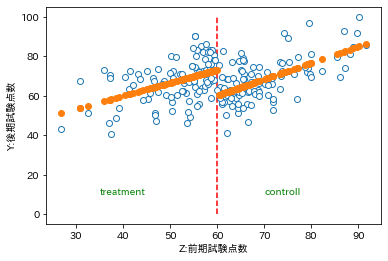

In [80]:
import numpy as np

plt.plot(data.Z, data.Y, 'o', mfc='white')
plt.vlines(60,0,100,linestyles='--', color='red')
for i, s in enumerate(['treatment', 'controll']):
    plt.text(x=35+35*i, y=10, s=s, color='green')
plt.xlabel('Z:前期試験点数')
plt.ylabel('Y:後期試験点数')

plt.plot(data['Z'], result.predict(), 'o')

$\tau$の値はTの係数に相当するので、前期試験の点数が$Z=60$の条件の下で、補講授業への参加が学力に与える因果的効果は、後期試験の点数でおよそ13.04点となる。
また、t値も十分大きく、補講授業の効果は統計的に有意と言える。

#### 条件付期待値が非線形の場合
条件付期待値が一般的な非線形関数である場合を考える。
#### 局所回帰
条件付期待値$E[Y_{1i}|Z_i],E[Y_{0i}|Z_i]$は一般的な関数$m_1,m_0$を用いてそれぞれ

$$
E[Y_{1i}|Z_i]=m_1(Z_i)\\
E[Y_{0i}|Z_i]=m_0(Z_i)
$$

と表すことができる。
$Z_i=c$を条件とした条件付平均トリートメント効果$\tau$は

$$
\begin{align}
\tau&=E[Y_{1i}|Z_i=c]-E[Y_{0i}|Z_i=c]\\
&=m_1(c)-m_0(c)
\end{align}
$$

と書ける。$Z_i=c$となるデータは存在しないので、$m_1(c),m_0(c)$をデータから直接推定することはできない。
ここで、$h$を十分小さなある正の数とするとき、$c-h\leq Z_i\leq c+h$を満たすような$c$の「h近傍」の$Z_i$について、関数$m_1(Z_i),m_0(Z_i)$を
$$
m_1(Z_i)\approx a_1,\ c-h\leq Z_i\leq c+h\\
m_0(Z_i)\approx a_0,\ c-h\leq Z_i\leq c+h
$$

として定数$a_1,a_0$でそれぞれ近似することが可能である。
このことは、トリートメント効果$\tau$が$\tilde{\tau}=a_1-a_0$と近似できることを意味する。
さらに、
$$
E[Y_{i}|Z_i,T_i]\approx a_0+\tilde{\tau}T_i,\hspace{5mm}c-h\leq Z_i\leq c+h
$$
と書くことができる。
これは条件「$c-h\leq Z_i\leq c+h$」を満たすデータのみを用いて、被説明変数を$Y_i$、説明変数を$T_i$とする局所的な線形回帰モデル
$$
Y_i=a_0+\tilde{\tau}T_i+\varepsilon_i,\hspace{5mm} c-h\leq Z_i\leq c+h
$$

を推定することで、$\tau$の近似値$\tilde{\tau}$を含む未知パラメータ$(a_0,\tilde{\tau})$の推定値が得られる。
このように、$Z_i$が$c$のh近傍に値をとるようなデータのみを用いた回帰分析の方法を**局所回帰**と呼ぶ。また、$h$を**バンド幅**と呼ぶ。

In [81]:
h = 5 # バンド幅
o = (60-h<=data['Z'])&(data['Z']<=60+h)

data_o = data[o]

df_X = sm.add_constant(data_o[['T']])
df_y = data_o['Y']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     25.40
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.34e-06
Time:                        01:15:16   Log-Likelihood:                -266.37
No. Observations:                  74   AIC:                             536.7
Df Residuals:                      72   BIC:                             541.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0736      1.612     38.514      0.0

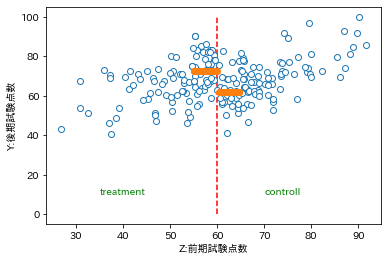

In [82]:
import numpy as np

plt.plot(data.Z, data.Y, 'o', mfc='white')
plt.vlines(60,0,100,linestyles='--', color='red')
for i, s in enumerate(['treatment', 'controll']):
    plt.text(x=35+35*i, y=10, s=s, color='green')
plt.xlabel('Z:前期試験点数')
plt.ylabel('Y:後期試験点数')

plt.plot(data_o['Z'], result.predict(), 'o')

この結果、前期試験の点数が$Z=60$の条件の下で、補講授業への参加が学力に与える因果的効果は、後期試験の点数で10.656点となる。
したがって、条件付期待値が線形関数と仮定した場合は、補講授業の効果を若干過大に推定していたことがわかる。
#### 局所線形回帰
$m_1(Z_i),m_0(Z_i)$の傾きの大きさも考慮に入れ、次のように修正する。
$$
m_1(Z_i)\approx a_{11}+a_{12}(Z_i-c),\hspace{5mm}c-h\leq Z_i\leq c+h\\
m_0(Z_i)\approx a_{01}+a_{02}(Z_i-c),\hspace{5mm}c-h\leq Z_i\leq c+h
$$
$a_{12},a_{02}$が、それぞれ$m_1(Z_i),m_0(Z_i)$の傾きに相当し、トリートメント効果$\tau$は$\tilde{\tau}=a_{11}-a_{01}$として近似できる。
さらに、
$$
E[Y_i|Z_i,T_i]\approx a_{01}+\tilde{\tau}T_i+a_{12}T_i(Z_i-c)+a_{02}(1-T_i)(Z_i-c),\hspace{5mm}c-h\leq Z_i\leq c+h
$$
となるので、条件「$c-h\leq Z_i\leq c+h$」を満たすデータのみを用いて、被説明変数を$Y_i$、説明変数を$T_i,T_i(Z_i-c),(1-T_i)(Z_i-c)$とする局所的な線形回帰モデル
$$
Y_i=a_{01}+\tilde{\tau}T_i+a_{12} T_i(Z_i-c)+a_{02}(1-T_i)(Z_i-c)+\varepsilon_i,\hspace{5mm}c-h\leq Z_i\leq c+h
$$
を推定することで、未知パラメータの推定値が得られる。

In [83]:
h = 5 # バンド幅
o = (60-h<=data['Z'])&(data['Z']<=60+h)

data_o = data[o]

df_X = sm.add_constant(data_o[['T','T(Z-60)','(1-T)(Z-60)']])
df_y = data_o['Y']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     8.443
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           7.29e-05
Time:                        01:15:20   Log-Likelihood:                -266.12
No. Observations:                  74   AIC:                             540.2
Df Residuals:                      70   BIC:                             549.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          63.6814      3.592     17.728      

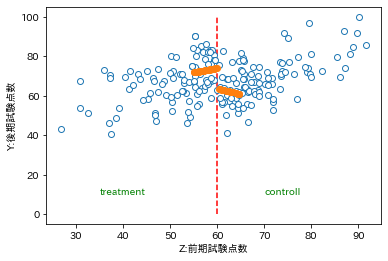

In [84]:
import numpy as np

plt.plot(data.Z, data.Y, 'o', mfc='white')
plt.vlines(60,0,100,linestyles='--', color='red')
for i, s in enumerate(['treatment', 'controll']):
    plt.text(x=35+35*i, y=10, s=s, color='green')
plt.xlabel('Z:前期試験点数')
plt.ylabel('Y:後期試験点数')

plt.plot(data_o['Z'], result.predict(), 'o')

因果的効果は、局所回帰の場合とほぼ同じ値となった。
#### 不連続回帰デザインの注意点
##### 強制変数の操作可能性
強制変数の値が個人によって完全に操作可能である場合、不連続回帰デザインを用いた分析は有効ではない。
##### 結果の解釈
$\tau$はあくまで$Z_i=c$を条件としたうえでのトリートメントの評価にすぎない。
「学生$i$と比べ学力が非常に高い$Z_j=100$の学生$j$にとっては、補講に参加する効果はほとんどゼロ」ということも考えられる。
##### バンド幅の選択
バンド幅の大きさを決めなければならない。
様々な方法が議論されているが、いずれも完璧ではない。従って、一定の範囲内でバンド幅を調節しながら推定結果の変化を確認し
、結果の判断は総合的に行う。
##### トリートメントの選択可能性
トリートメントが選択可能性である場合もある。
このような場合でも、トリートメントの割り当ての確率$P(T_i=1|Z_i)$が$Z_i=c$において不連続であれば、FuzzyRDDと呼ばれる手法でトリートメント効果が推定可能である。